### Guiding clustering with active learning

Active learning methods select samples for which to obtain labels to improve the classifier as much as possible with the smallest burden on the human oracles answering queries. For instance, if we have two classes, established by some training data, the samples on the boundaries of those two classes are very informative. If we get labels for these boundary samples, the classifier can be improved.

If it is difficult for the human oracle to provide ground truth class labels, it may be easier to query the oracle about whether two examples are in the same or different classes. Active learning queries of this type can be used as constraints on a clustering problem. The purpose of active clustering is to select informative query pairs to guide the clustering result.

In robustclust, two popular query select techniques, farthest-first query selection (FFQS) and minimax FFQS (MMFFQS) have been implemented. In addition, a novel technique, called active class discovery (ACD), seeks query pairs which mimic the hierarchical structure of the data, to provide more impactful information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from scipy.spatial.distance import pdist

from robustclust import get_constraints, \
                        plot_constraints
        
N, n_clusters, n_query = 300, 6, 30

data, labels = ds.make_blobs(
    n_samples=N, 
    n_features=2, 
    centers=n_clusters)

#### Minimax farthest-first query selection

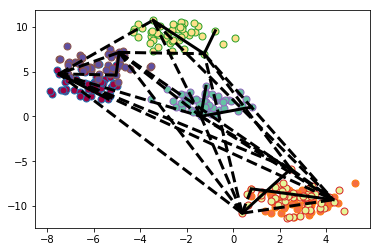

In [2]:
constraint_mat, _ = get_constraints(
    data,
    labels,  
    method='mmffqs', 
    n_constraints=n_query, 
    err_rate=0)

plot_constraints(data, labels=labels, constraint_mat=constraint_mat)

#### Active class discovery

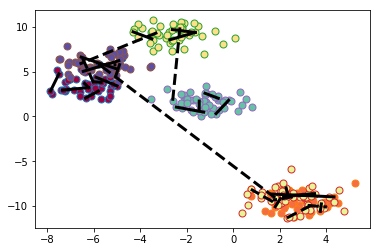

In [3]:
constraint_mat, _ = get_constraints(
    data,
    labels,  
    method='acd', 
    n_constraints=n_query, 
    err_rate=0)


plot_constraints(data, labels=labels, constraint_mat=constraint_mat)